### Context:


Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.


## Content


This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio



Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Acknowledgements
This dataset was downloaded from the UCI ML Repository:

## Importing the Necessary Libraries

In [2]:
%run jupyter_imports_settings.py

Exception: File `'jupyter_imports_settings.py'` not found.

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing the Dataset

In [14]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

#Checking the details of the first 10 patients/rows in the dataset
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [15]:
#Checking the dimension of the dataset


print(f"The dataset has {data.shape[1]} columns, and {data.shape[0]} rows. That is:")

print(f"In the dataset, we are considering, we have {data.shape[0]} patients, and we have {data.shape[1]} features \
helping us describe each patient.")

The dataset has 11 columns, and 583 rows. That is:
In the dataset, we are considering, we have 583 patients, and we have 11 features helping us describe each patient.


In [16]:
#Let's see the datatype of the variables in our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


There are 10 numerical variables and 1 categorical variable in the dataset.

In [17]:
#The exlploratory data dictionary of the dataset
data.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [19]:
#Checking for missing data
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# UNIVARIATE ANALYSIS


## DEPENDENT VARIABLE:
The dependent variable in this dataset is the variable named **Dataset**. It is describing whether a patient has liver disease or not

### 1. DATASET

I will create a class/module to perform visualization on the numerical variables.

In [21]:
#Importing the visualization module I created.
from viz import Viz

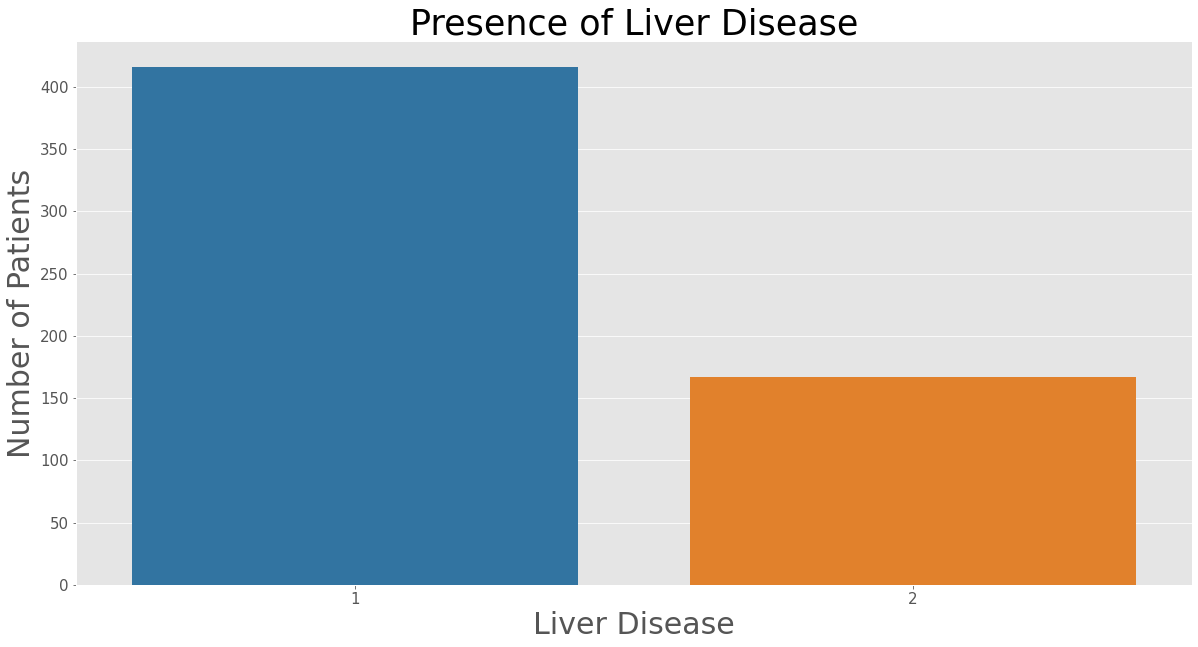

In [22]:
liver = Viz(data = data, variable = 'Dataset', title = "Presence of Liver Disease", ylabel = "Number of Patients", 
             xlabel = "Liver Disease") 

liver.countplot_viz(palette = 'tab10')

## INDEPENDENT VARIABLE (NUMERICAL)


### 1. AGE

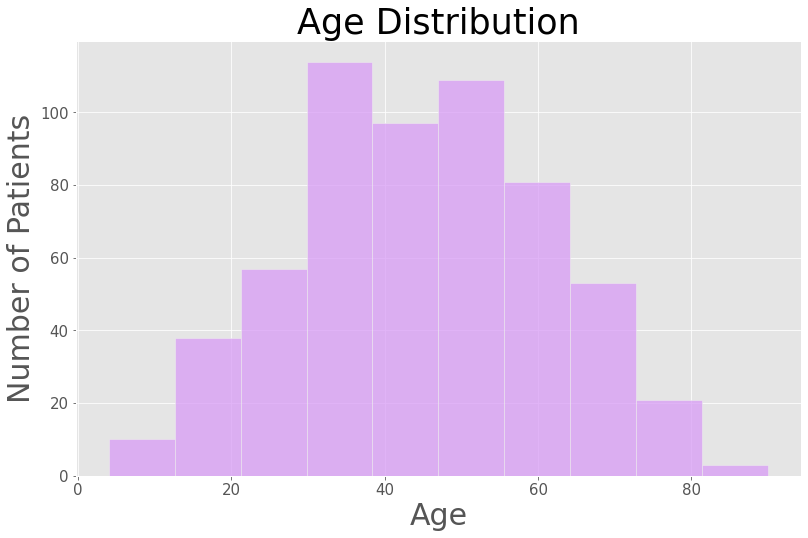

In [23]:
ageviz = Viz(data = data, variable = 'Age', title = "Age Distribution", ylabel = "Number of Patients", xlabel = "Age") 

ageviz.distributionplot_viz(color = "#d89cf6", bins = 10)

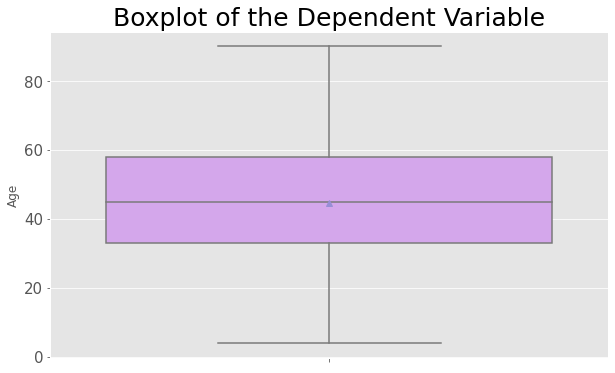

In [24]:
ageviz.boxplot_viz(color = "#d89cf6", btitle = "Boxplot of the Dependent Variable")

### 2. Total Bilirubin

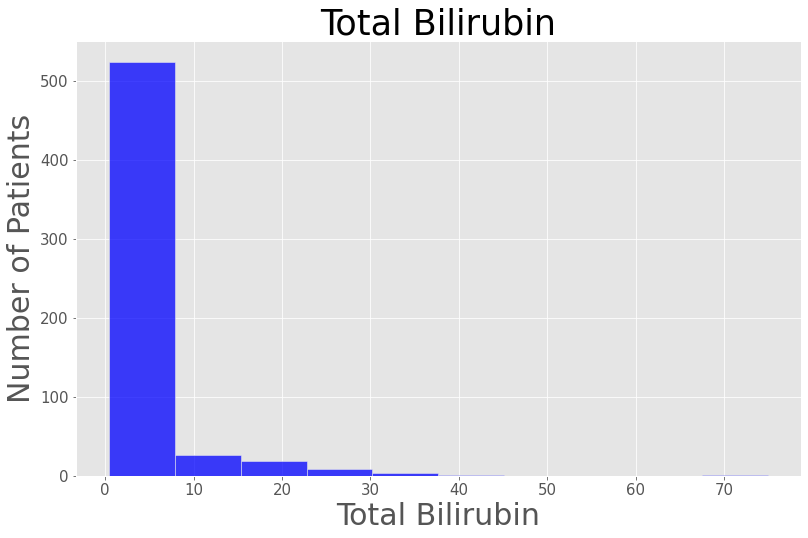

In [25]:
totalbilirubin = Viz(data = data, variable = 'Total_Bilirubin', title = "Total Bilirubin", ylabel = "Number of Patients", 
                     xlabel = "Total Bilirubin") 

totalbilirubin.distributionplot_viz(color = "blue", bins = 10)

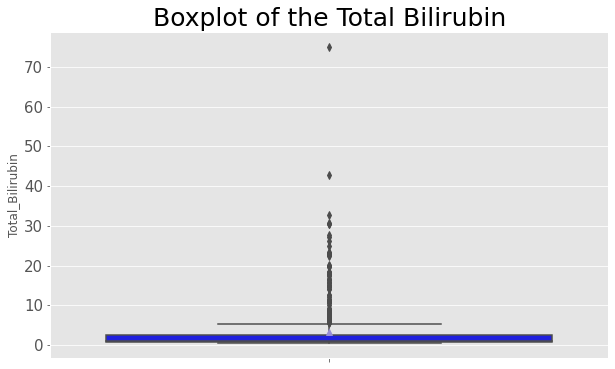

In [26]:
totalbilirubin.boxplot_viz(color = "blue", btitle = "Boxplot of the Total Bilirubin")

### 3. Direct Bilirubin

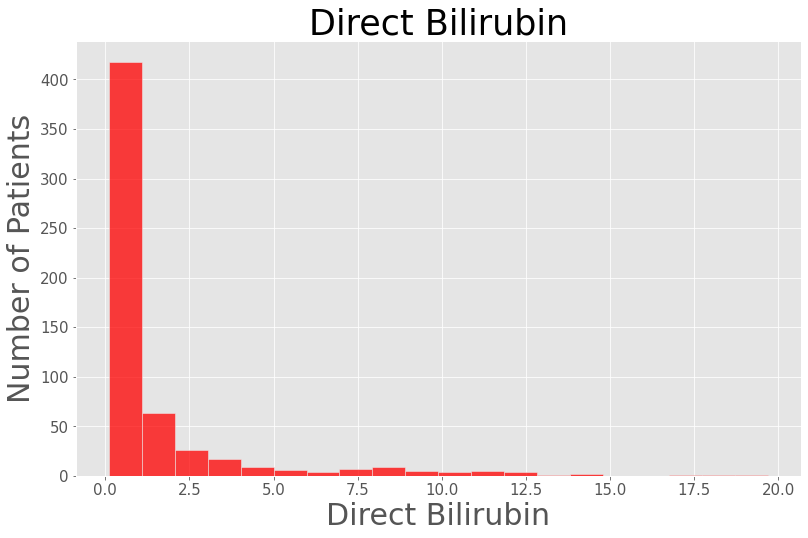

In [27]:
directbilirubin = Viz(data = data, variable = 'Direct_Bilirubin', title = "Direct Bilirubin", ylabel = "Number of Patients", 
                     xlabel = "Direct Bilirubin") 

directbilirubin.distributionplot_viz(color = "red", bins = 20)

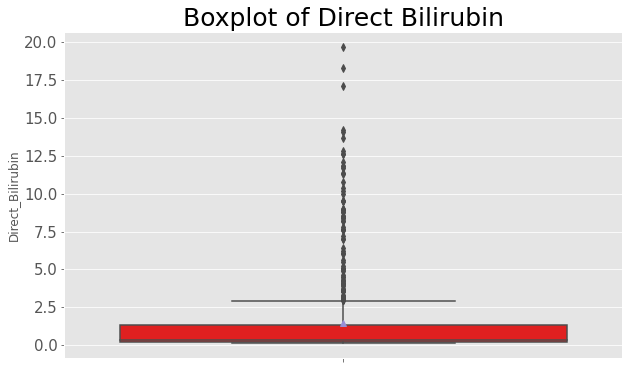

In [28]:
directbilirubin.boxplot_viz(color = "red", btitle="Boxplot of Direct Bilirubin")

### 4. Alkaline_Phosphotase

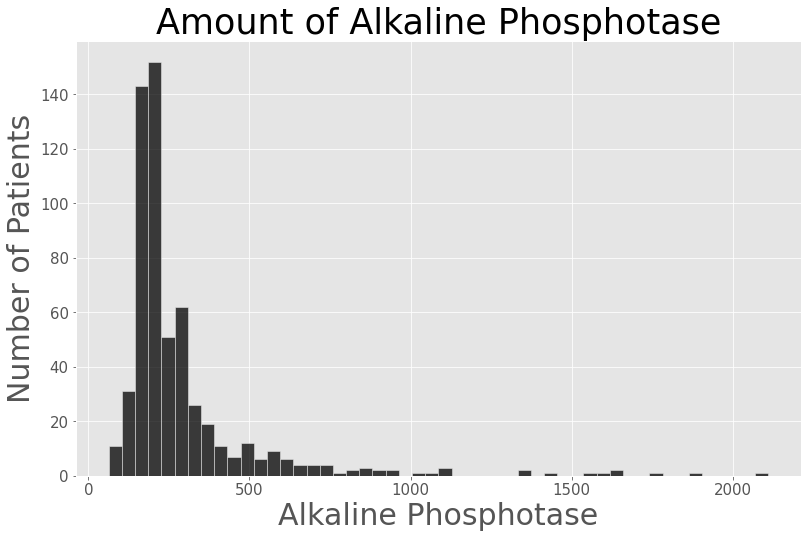

In [29]:
alkaline_phosphotase = Viz(data = data, variable = 'Alkaline_Phosphotase', title = "Amount of Alkaline Phosphotase", 
                      ylabel = "Number of Patients", xlabel = "Alkaline Phosphotase") 

alkaline_phosphotase.distributionplot_viz(color = "black", bins = 50)

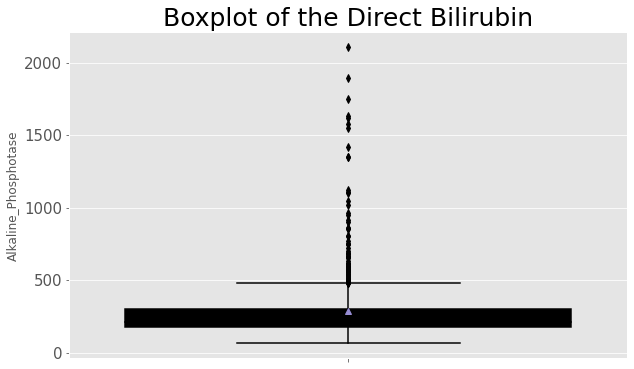

In [30]:
alkaline_phosphotase.boxplot_viz(color = "black", btitle = "Boxplot of the Direct Bilirubin")

### 5. Alamine Aminotransferase.

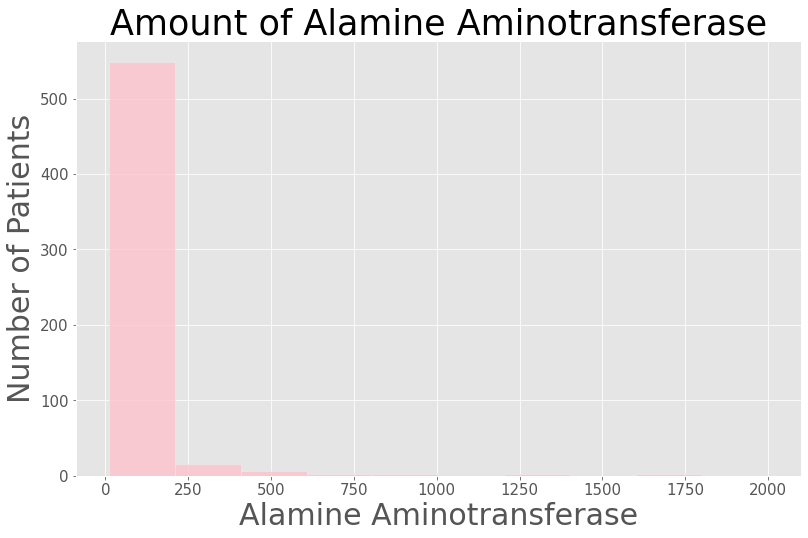

In [31]:
alamineaminotransferase = Viz(data = data, variable = 'Alamine_Aminotransferase', title = "Amount of Alamine Aminotransferase", 
                              ylabel = "Number of Patients", xlabel = "Alamine Aminotransferase") 

alamineaminotransferase.distributionplot_viz(color = "pink", bins = 10)

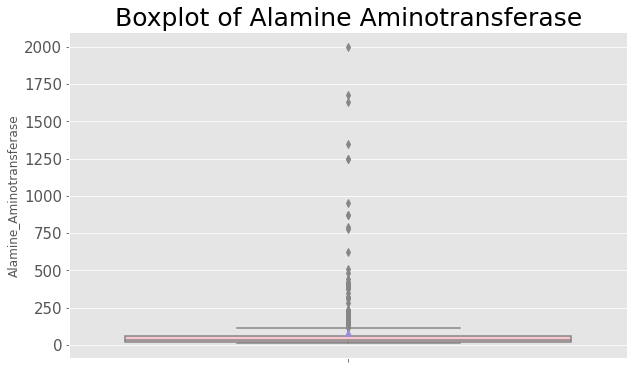

In [32]:
alamineaminotransferase.boxplot_viz(color = "pink", btitle = "Boxplot of Alamine Aminotransferase")

### 6. Aspartate Aminotransferase

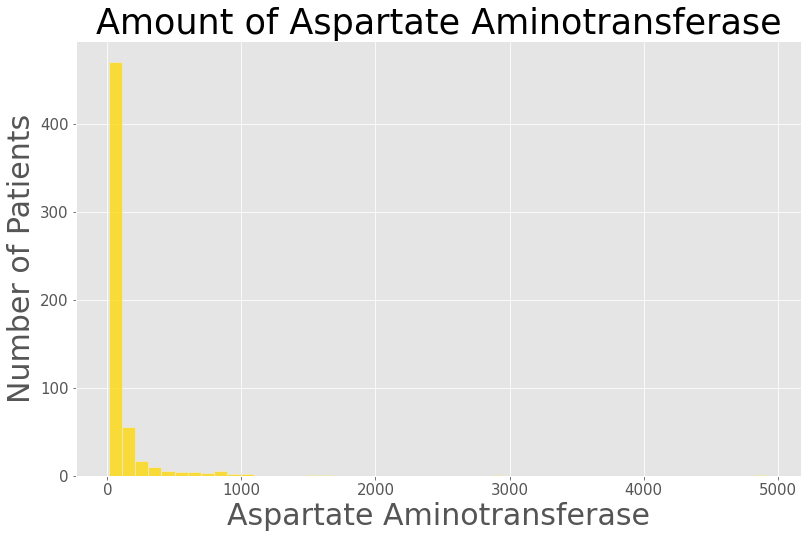

In [33]:
aspaamino = Viz(data = data, variable = 'Aspartate_Aminotransferase', title = "Amount of Aspartate Aminotransferase", 
                              ylabel = "Number of Patients", xlabel = "Aspartate Aminotransferase") 

aspaamino.distributionplot_viz(color = "gold", bins = 50)

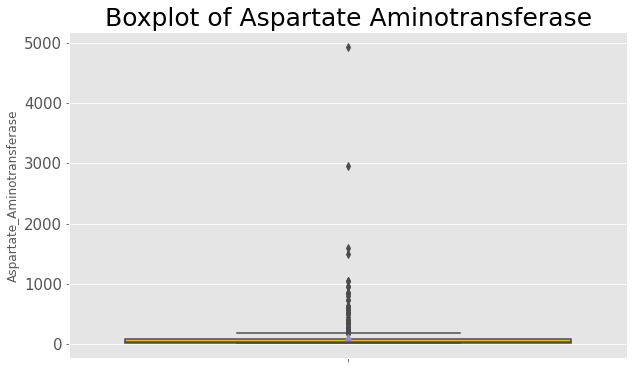

In [34]:
aspaamino.boxplot_viz(color = "gold", btitle = "Boxplot of Aspartate Aminotransferase")

### 7. Total Proteins

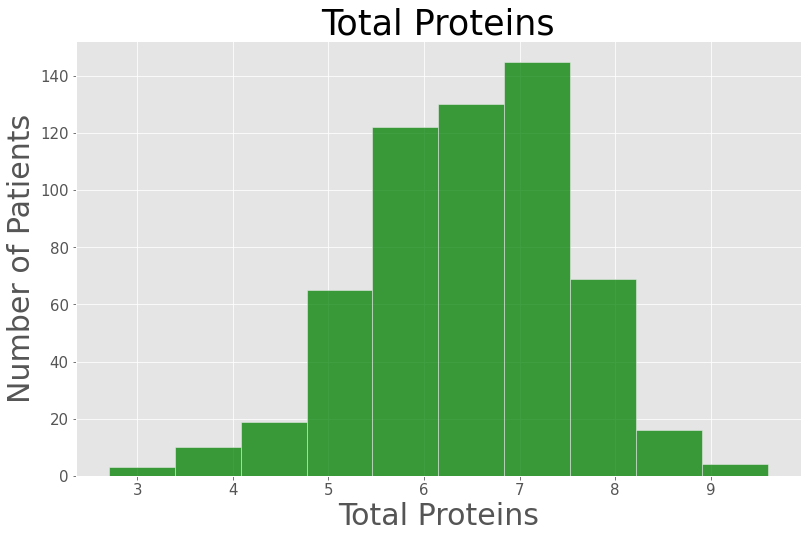

In [35]:
totalprotein = Viz(data = data, variable = 'Total_Protiens', title = "Total Proteins", 
                              ylabel = "Number of Patients", xlabel = "Total Proteins") 

totalprotein.distributionplot_viz(color = "green", bins = 10)

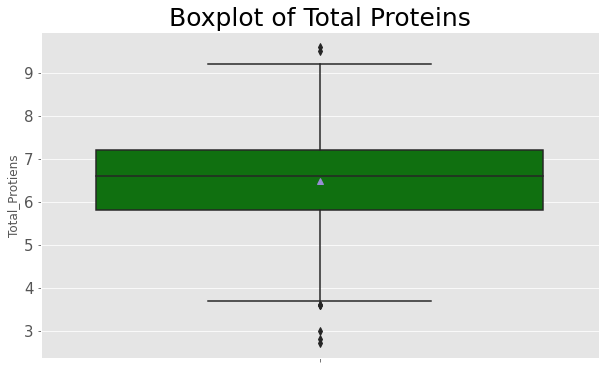

In [36]:
totalprotein.boxplot_viz(color = "green", btitle = "Boxplot of Total Proteins")

### 8. Albumin

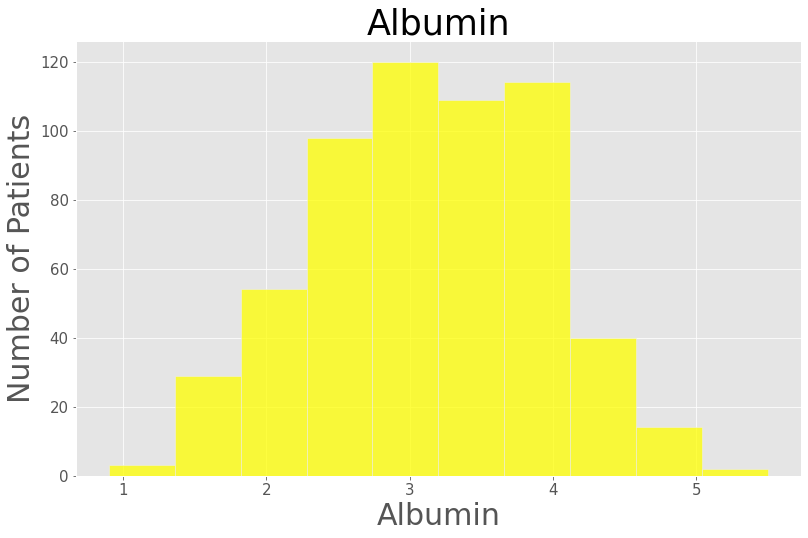

In [37]:
albumin = Viz(data = data, variable = 'Albumin', title = "Albumin", 
                              ylabel = "Number of Patients", xlabel = "Albumin") 

albumin.distributionplot_viz(color = "yellow", bins = 10)

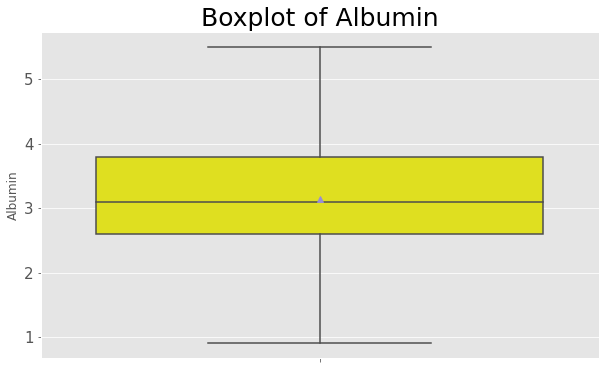

In [38]:
albumin.boxplot_viz(color = "yellow", btitle = "Boxplot of Albumin")

### 9. Albumin and Globulin Ratio

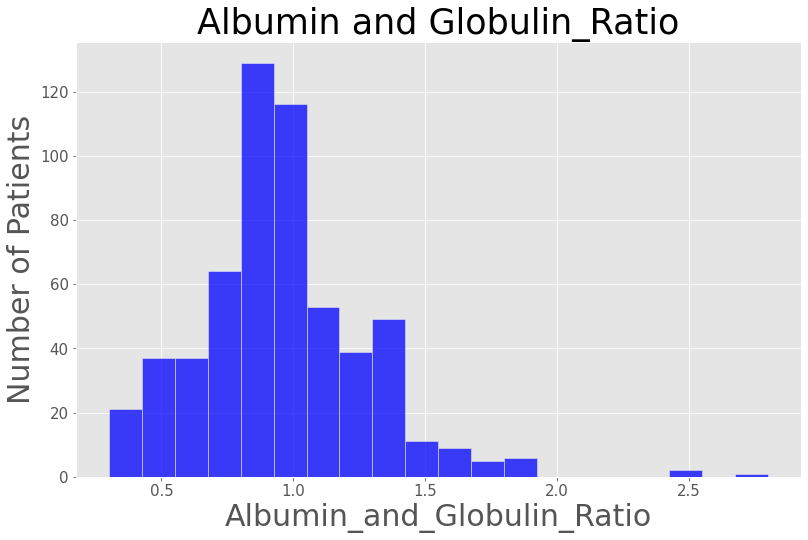

In [39]:
albumin_globulin = Viz(data = data, variable = 'Albumin_and_Globulin_Ratio', title = "Albumin and Globulin_Ratio", 
                              ylabel = "Number of Patients", xlabel = "Albumin_and_Globulin_Ratio") 

albumin_globulin.distributionplot_viz(color = "blue", bins = 20)

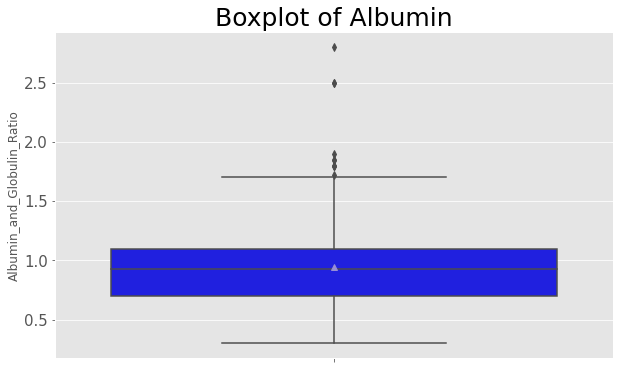

In [40]:
albumin_globulin.boxplot_viz(color = "blue", btitle = "Boxplot of Albumin")

In [41]:
# Filling the missing values in this variable, Albumin and Globulin Ratio. 
# I will be fillig the missing values with the mode.
data['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [42]:
data['Albumin_and_Globulin_Ratio'].fillna(1.0, inplace = True)

In [43]:
#Checking again for missing variables.

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## INDEPENDENT VARIABLE (CATEGORICAL).

### Gender

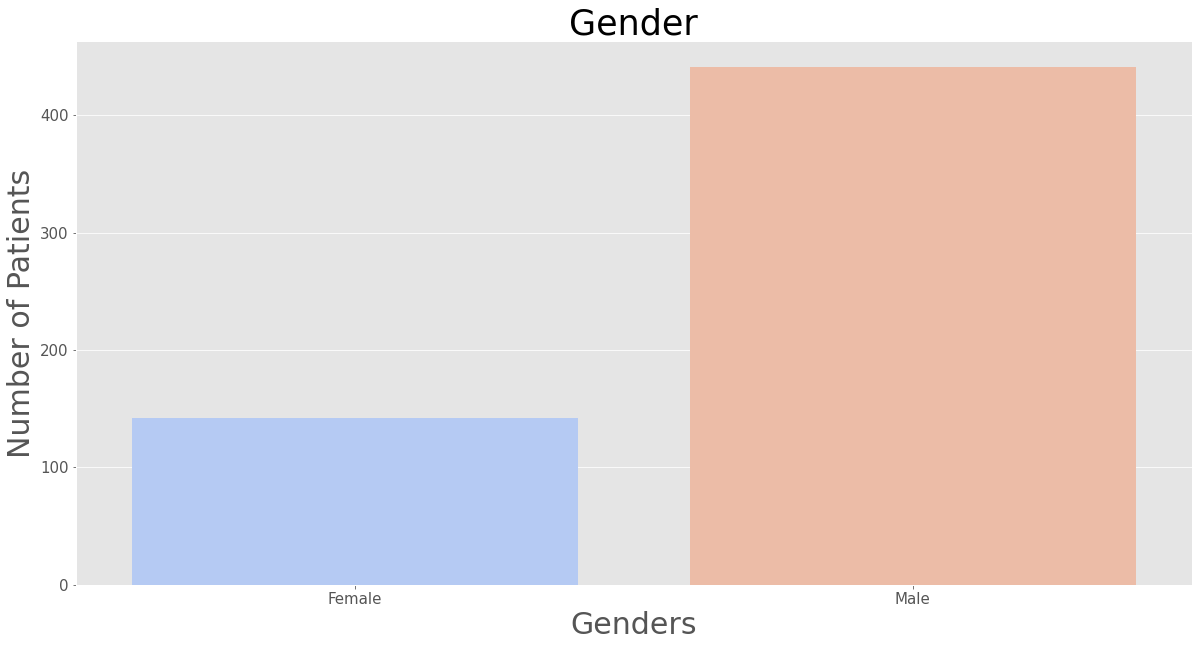

In [44]:
genderviz = Viz(data =data, variable = 'Gender', title = "Gender", ylabel = "Number of Patients", xlabel = "Genders")


genderviz.countplot_viz(palette = 'coolwarm')

# BIVARIATE ANALYSIS


## Liver disease VS AGE

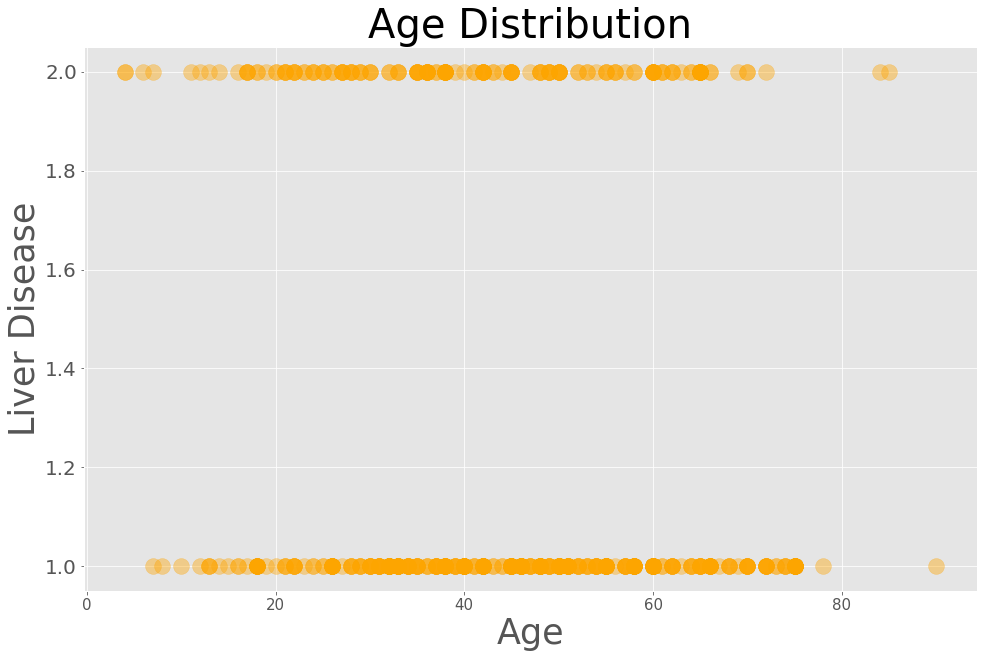

In [45]:
agevsliver = Viz(data =data, variable = 'Age', title = "Age Distribution", ylabel = "Liver Disease", xlabel = "Age") 

agevsliver.scatterplot_viz(variable2 = 'Dataset', color = 'orange', size = 250)

## Correlation Analysis

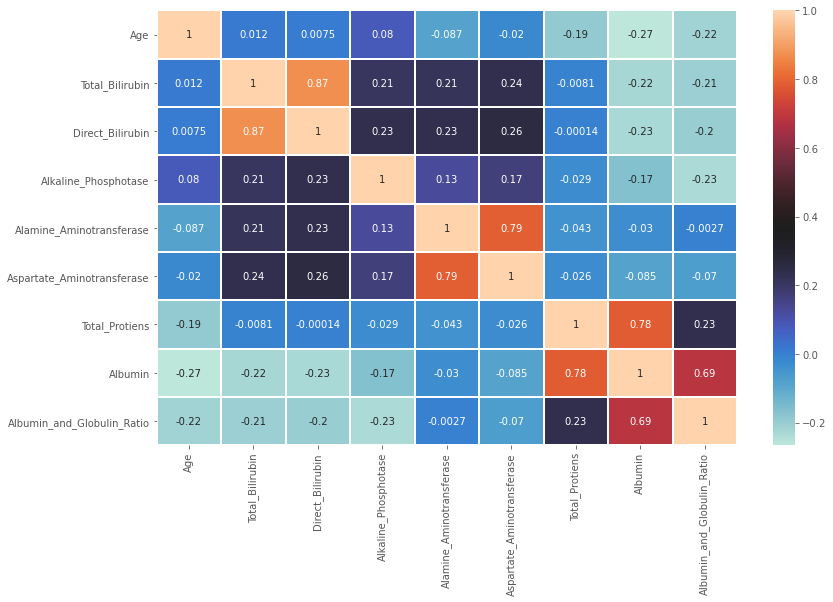

In [46]:
plt.figure(figsize=[13, 8])
sns.heatmap(data.drop(['Dataset'], 1).corr(), annot = True, cmap="icefire", lw = 1)
plt.show()

# MODEL

In [189]:
#Encoding the categorical variable, gende
from sklearn.preprocessing import LabelEncoder
#Label Encoding.

label = LabelEncoder()
data['Gender_encoded'] = label.fit_transform(data['Gender'])

In [190]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_encoded
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


# Encoding of the Gender variable.

## The variable has two value and they have been encoded thus



### FEMALE - 0


### MALE - 1

In [191]:
#Selecting the features to be used to train the model.
train = ['Age','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Gender_encoded']

test =['Dataset']

In [192]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.svm import SVC

In [193]:
X = np.array(data[train])

y = np.array(data[test])

In [194]:
def score_function(y_pred, y_test):

    Acc = accuracy_score(y_test, y_pred)
    Pre = precision_score(y_test, y_pred)
    Rec = recall_score(y_test, y_pred)

    data = pd.DataFrame()
    names = ["Accuracy", "Precision", "Recall"]
    values = [Acc, Pre, Rec]
    data["Names"] = names
    data['Scores'] = values

    return data

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(466, 10) (117, 10) (466, 1) (117, 1)


# UNSCALED

In [196]:
#Support Vector Classification for Kernel SVM
lr=SVC(kernel='rbf', random_state=0)
lr.fit(X_train, y_train.ravel())
predictions=lr.predict(X_test)


In [197]:
scores = score_function(predictions, y_test)

scores

,Names,Scores
0,Accuracy,0.769231
1,Precision,0.769231
2,Recall,1.000000


## Getting our model ready for deployment

* To do this, we will save our trained model to disk using pickle and this will make it useable later 

* Pickle : Python pickle module is used for serializing and de-serializing python object structures. The process to convert any kind of python object (list, dict, etc.) into byte streams (0s and 1s) is called pickling or serialization or flattening or marshalling. We can converts the byte stream (generated through pickling) back into python objects by a process called as unpickling.

In [198]:
import pickle

with open('liverdisease_svc_kernel.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [199]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [111]:
clf = pickle.load(open('liverdisease_svc_kernel.pkl', 'rb'))